In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("clean_superstore_sales.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4441 entries, 0 to 4440
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         4441 non-null   int64  
 1   Order ID       4441 non-null   object 
 2   Order Date     4441 non-null   object 
 3   Ship Date      4441 non-null   object 
 4   Ship Mode      4441 non-null   object 
 5   Customer ID    4441 non-null   object 
 6   Customer Name  4441 non-null   object 
 7   Segment        4441 non-null   object 
 8   Country        4441 non-null   object 
 9   City           4441 non-null   object 
 10  State          4441 non-null   object 
 11  Postal Code    4441 non-null   int64  
 12  Region         4441 non-null   object 
 13  Product ID     4441 non-null   object 
 14  Category       4441 non-null   object 
 15  Sub-Category   4441 non-null   object 
 16  Product Name   4441 non-null   object 
 17  Sales          4441 non-null   float64
 18  Order_Ye

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Year,Order_Month,Shipping_Days
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2017,8,92
1,3,CA-2017-138688,2017-12-06,2017-12-09,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,office supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2017,12,3
2,5,US-2016-108966,2016-11-10,2016-11-13,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,office supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2016,11,3
3,6,CA-2015-115812,2015-09-06,2015-09-09,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,2015,9,3
4,7,CA-2015-115812,2015-09-06,2015-09-09,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,office supplies,Art,Newell 322,54.900,2015,9,3


In [5]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [6]:
df["Order_Year"] = df["Order Date"].dt.year

In [7]:
df["Order_Month"] = df["Order Date"].dt.month

In [8]:
df["Order_Month_Name"] = df["Order Date"].dt.month_name()

In [9]:
# Yearly Sales
yearly_sales = df.groupby("Order_Year")["Sales"].sum().reset_index()
yearly_sales

,Order_Year,Sales
0,2015,69721.7442
1,2016,79428.6157
2,2017,98305.7755
3,2018,116962.4186
4,2019,2078.5720


In [10]:
import matplotlib.pyplot as plt

In [11]:
df["Order_Year"].value_counts().sort_index()

Order_Year
2015     852
2016     945
2017    1143
2018    1480
2019      21
Name: count, dtype: int64

In [12]:
df = df[df["Order_Year"] != 2019]

In [13]:
yearly_sales = df.groupby("Order_Year")["Sales"].sum().reset_index()

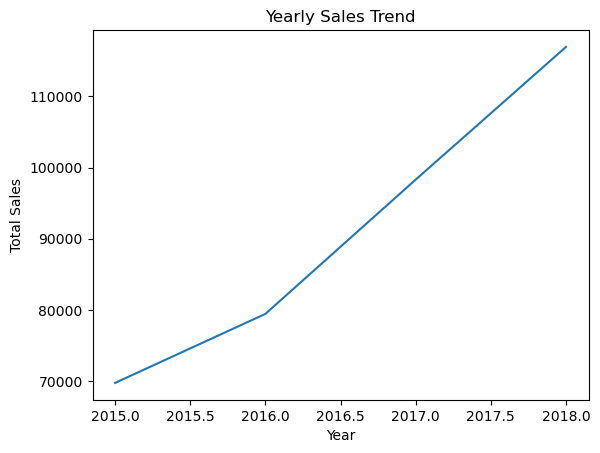

In [14]:
plt.figure()
plt.plot(yearly_sales["Order_Year"], yearly_sales["Sales"])
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

## Insight
Sales show consistent year-over-year growth from 2015 to 2018, indicating stable business expansion.
2019 was removed due to incomplete data and would have distorted the trend.

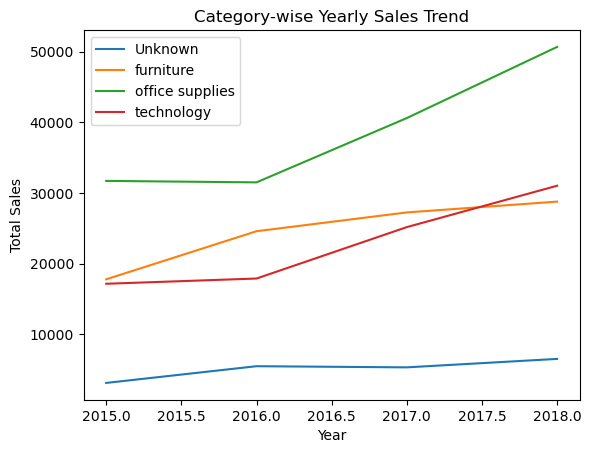

In [15]:
# Category-wise yearly trend
cat_year = df.groupby(["Order_Year", "Category"])["Sales"].sum().reset_index()

plt.figure()

for cat in cat_year["Category"].unique():
    temp = cat_year[cat_year["Category"] == cat]
    plt.plot(temp["Order_Year"], temp["Sales"], label=cat)

plt.title("Category-wise Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

## Insight
Office Supplies shows the strongest year-over-year growth, making it the primary driver of sales expansion. Technology also shows healthy growth, while Furniture grows slowly and may need pricing or product strategy review. The “Unknown” category contributes minimal sales and should be fixed at the data level.

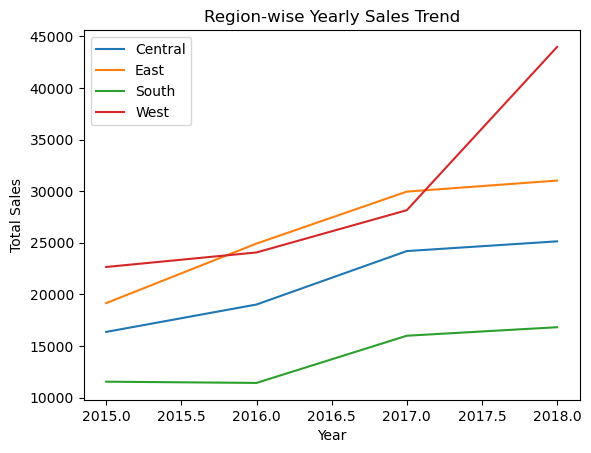

In [16]:
# Region-wise yearly trend
reg_year = df.groupby(["Order_Year", "Region"])["Sales"].sum().reset_index()

plt.figure()
for r in reg_year["Region"].unique():
    temp = reg_year[reg_year["Region"] == r]
    plt.plot(temp["Order_Year"], temp["Sales"], label=r)

plt.title("Region-wise Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

## Region Insight
The West region shows the strongest year-over-year growth, especially a sharp increase in 2018, making it the top-performing growth region. East shows steady but slower growth. Central grows gradually without acceleration. South remains the weakest region and needs focused strategy to improve demand

In [17]:
yearly_sales["Growth_%"] = yearly_sales["Sales"].pct_change() * 100
yearly_sales

,Order_Year,Sales,Growth_%
0,2015,69721.7442,NaN
1,2016,79428.6157,13.922302
2,2017,98305.7755,23.766195
3,2018,116962.4186,18.978176


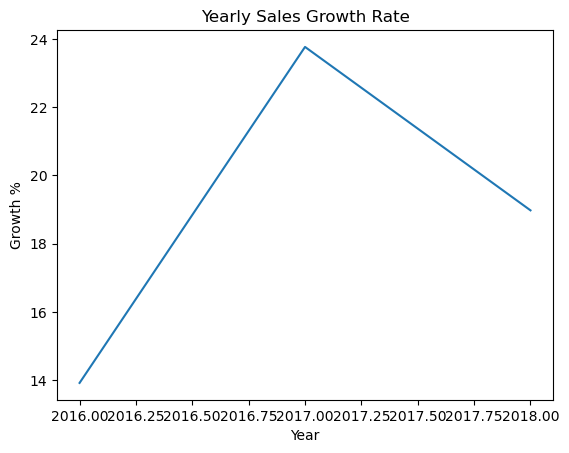

In [18]:
plt.figure()
plt.plot(yearly_sales["Order_Year"], yearly_sales["Growth_%"])
plt.title("Yearly Sales Growth Rate")
plt.xlabel("Year")
plt.ylabel("Growth %")
plt.show()

## Insight
Sales growth peaked in 2017, showing the strongest expansion phase.
Growth slowed in 2018, meaning the market started stabilizing or competition increased.
The company should identify what worked in 2017 (products, regions, marketing) and replicate that strategy, while fixing weak regions like South to avoid future slowdown.

In [19]:
# Category-wise Growth %
cat_year = df.groupby(["Order_Year","Category"])["Sales"].sum().reset_index()
cat_year["Growth_%"] = cat_year.groupby("Category")["Sales"].pct_change() * 100
cat_year

,Order_Year,Category,Sales,Growth_%
0,2015,Unknown,3104.6750,NaN
1,2015,furniture,17771.8282,NaN
2,2015,office supplies,31703.4930,NaN
3,2015,technology,17141.7480,NaN
4,2016,Unknown,5470.6540,76.206978
5,2016,furniture,24579.5977,38.306523
6,2016,office supplies,31495.4580,-0.656190
7,2016,technology,17882.9060,4.323701
8,2017,Unknown,5308.2160,-2.969261
9,2017,furniture,27240.2225,10.824525


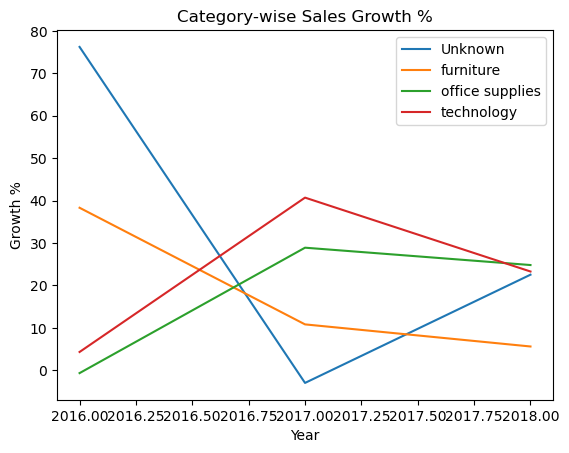

In [20]:
plt.figure()
for c in cat_year["Category"].unique():
    temp = cat_year[cat_year["Category"] == c]
    plt.plot(temp["Order_Year"], temp["Growth_%"], label=c)

plt.title("Category-wise Sales Growth %")
plt.xlabel("Year")
plt.ylabel("Growth %")
plt.legend()
plt.show()

## Insight
- Technology shows the strongest momentum
Growth spikes around 2017 (~40%), then cools down in 2018. This means tech products drive big jumps but are volatile.
→ Strategy: push tech during high-demand periods, but don’t depend on it alone.

- Office Supplies is the most stable category
Growth is positive every year and fairly consistent (roughly 0% → 29% → 25%).
→ Strategy: this is your “safe engine” — steady revenue, low risk. Invest consistently.

- Furniture is slowing down
Growth drops every year (around 38% → 11% → 6%).
→ Strategy: furniture is losing momentum. Needs redesign, pricing changes, or better marketing.

- “Unknown” category is unreliable
Huge spike, then negative, then recovery. That’s messy data + unstable category.
→ Strategy: clean or eliminate “Unknown” from serious business decisions

In [21]:
# Region-wise Growth %
reg_year = df.groupby(["Order_Year","Region"])["Sales"].sum().reset_index()
reg_year["Growth_%"] = reg_year.groupby("Region")["Sales"].pct_change() * 100
reg_year


,Order_Year,Region,Sales,Growth_%
0,2015,Central,16364.3602,NaN
1,2015,East,19157.8230,NaN
2,2015,South,11543.1995,NaN
3,2015,West,22656.3615,NaN
4,2016,Central,19019.3252,16.224068
5,2016,East,24922.9090,30.092595
6,2016,South,11422.6095,-1.044684
7,2016,West,24063.7720,6.211988
8,2017,Central,24196.3270,27.219692
9,2017,East,29957.6330,20.201189


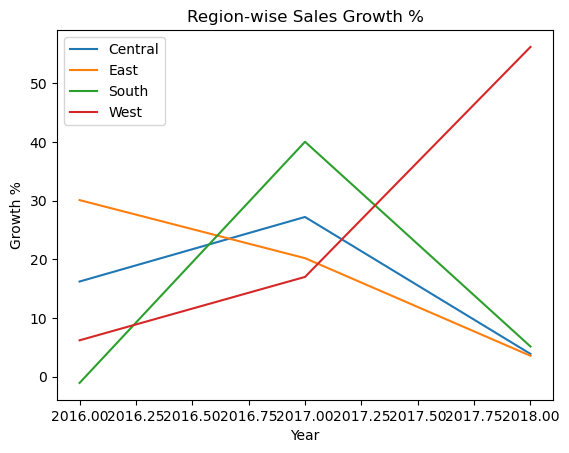

In [22]:
plt.figure()
for r in reg_year["Region"].unique():
    temp = reg_year[reg_year["Region"] == r]
    plt.plot(temp["Order_Year"], temp["Growth_%"], label=r)

plt.title("Region-wise Sales Growth %")
plt.xlabel("Year")
plt.ylabel("Growth %")
plt.legend()
plt.show()

## Insight
West region shows the fastest growth beacuse it has higher technology category sales and a growing customer base that prefers high value tech product.

# Final Business Recommendations
## Double Down on West Region

- West has the highest growth rate and strongest upward trend.

- Likely driven by high Technology sales and strong customer demand.

### Action:

- Increase marketing budget in West.

- Push premium/tech products harder here.

- Improve delivery speed and stock availability for West.

## Fix South Region – It’s Underperforming

- South shows weak or unstable growth.

### Action:

- Analyze product mix: what sells in other regions but not in South?

- Run discounts or bundles in South.

- Improve distribution and delivery time.

## Technology = Growth Engine

- Tech category shows big growth spikes.

- High reward but unstable.

### Action:

- Launch new tech products regularly.

- Target tech buyers with ads and offers.

- Track tech demand monthly, not yearly.

## Office Supplies = Stability Engine

- Most consistent growth.

### Action:

- Keep steady investment.

- Use office supplies for repeat customers and subscriptions.

## Furniture Is Losing Speed

- Growth is dropping every year.

### Action:

- Refresh designs or drop low-selling items.

- Test price cuts or combo offers.

- If it doesn’t recover, reduce focus.

## Clean “Unknown” Category

- Too unstable to trust.

### Action:

- Fix data source so category is always known.

- Never use “Unknown” for business decisions.